In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib as plt 
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("german_credit_data.xls",index_col=0)
df.head() 

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [6]:
df.shape

(1000, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB


In [9]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [11]:
df.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
dtype: int64

In [12]:
#veri kümesi içiersindeki eksik verilerin sayıları ve oranları
pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/len(df)], 
          axis=1).rename(columns={0:'Missing Records', 1:'Percentage (%)'})  

,Missing Records,Percentage (%)
Age,0,0.0
Sex,0,0.0
Job,0,0.0
Housing,0,0.0
Saving accounts,183,18.3
Checking account,394,39.4
Credit amount,0,0.0
Duration,0,0.0
Purpose,0,0.0


In [15]:
df["Saving accounts"].value_counts(dropna = False)

little        603
NaN           183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [16]:
df["Checking account"].value_counts(dropna = False)

NaN         394
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [18]:
#kategorik değişkenlerimi mod ile dolduruyorum
for column in df.columns:
    df[column].fillna(df[column].mode()[0],inplace = True)

In [19]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


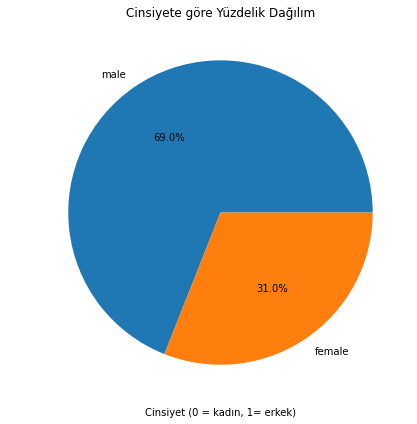

In [20]:
fig = plt.figure(figsize=(7,7))   
df['Sex'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.xlabel("Cinsiyet (0 = kadın, 1= erkek)")
plt.ylabel(" ", fontsize = 20)
plt.title("Cinsiyete göre Yüzdelik Dağılım")
print("")   

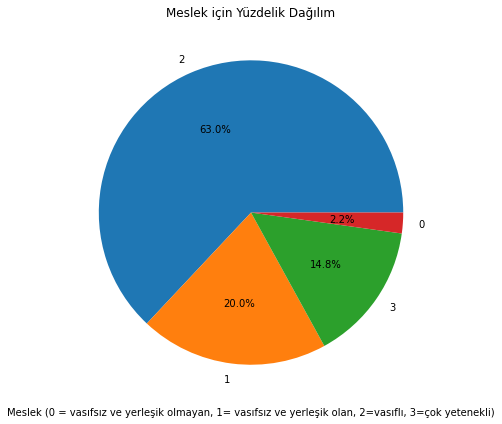

In [21]:
fig = plt.figure(figsize=(7,7))   
df['Job'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.xlabel("Meslek (0 = vasıfsız ve yerleşik olmayan, 1= vasıfsız ve yerleşik olan, 2=vasıflı, 3=çok yetenekli)")
plt.ylabel(" ", fontsize = 20)
plt.title("Meslek için Yüzdelik Dağılım")
print("") 

In [29]:
n_credits = df.groupby("Purpose")["Age"].count().rename("Count").reset_index()
n_credits

,Purpose,Count
0,business,97
1,car,337
2,domestic appliances,12
3,education,59
4,furniture/equipment,181
5,radio/TV,280
6,repairs,22
7,vacation/others,12


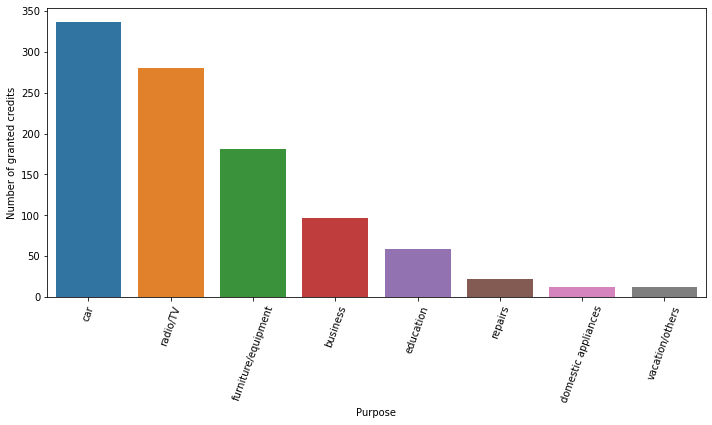

In [23]:
#Verilen kredinin hangi amaçla alındıgını görmek için
n_credits = df.groupby("Purpose")["Age"].count().rename("Count").reset_index()
n_credits.sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(10,6))
bar = sns.barplot(x="Purpose",y="Count",data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=70)
plt.ylabel("Number of granted credits")
plt.tight_layout()

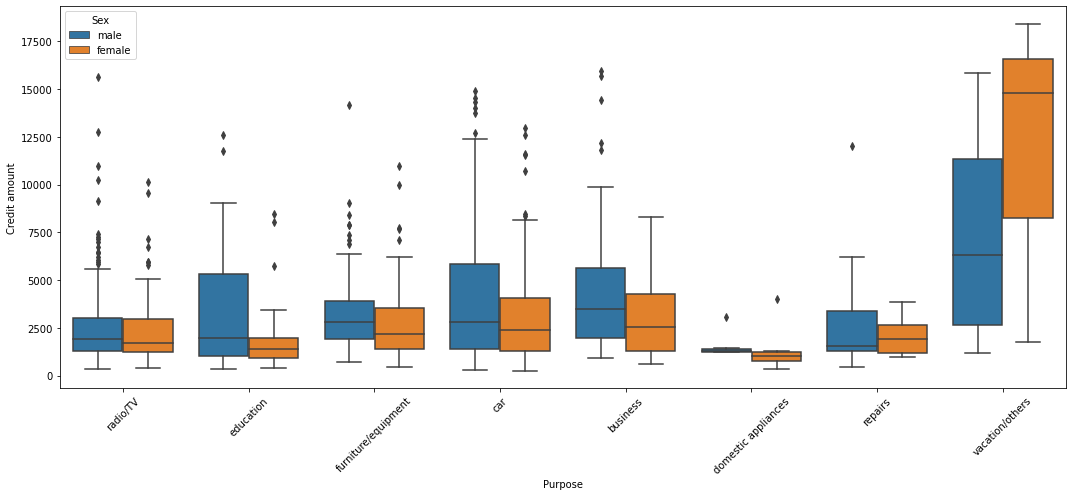

In [31]:
def boxes(x,y,h,r=45):
    fig, ax = plt.subplots(figsize=(15,7))
    box = sns.boxplot(x=x,y=y, hue=h, data=df)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()
    
boxes("Purpose","Credit amount","Sex")

* Veri görselleştirme aşamasından sonra makine öğrenmesi algoritmalarını uygulamak için veri kümesinde bazı düzenlemeler yapıyorum

In [34]:
df.rename(columns = {'Saving accounts': 'Saving_accounts'}, inplace=True)
df.rename(columns = {'Checking account': 'Checking_account'}, inplace=True)
df.rename(columns = {'Credit amount': 'Credit_amount'}, inplace=True)

df.head(5)

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [35]:
print("Sex' : ",df['Sex'].unique())
print("Housing : ",df['Housing'].unique())
print("Saving_accounts : ",df['Saving_accounts'].unique())
print("Checking_account : ",df['Checking_account'].unique())
print("Purpose : ",df['Purpose'].unique())

Sex' :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving_accounts :  ['little' 'quite rich' 'rich' 'moderate']
Checking_account :  ['little' 'moderate' 'rich']
Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


* Kategorik değişkenlerin dönüştürülmesi için Label Encoder yöntemini uygulayacağım

In [37]:
from sklearn import preprocessing   
le = preprocessing.LabelEncoder() 

df['Sex'] = le.fit_transform(df['Sex'])
df['Housing'] = le.fit_transform(df['Housing'])
df['Saving_accounts'] = le.fit_transform(df['Saving_accounts'])
df['Checking_account'] = le.fit_transform(df['Checking_account'])
df['Purpose'] = le.fit_transform(df['Purpose'])

df.head(5) 

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,67,1,2,1,0,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,0,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Sex', axis=1), df['Sex'], test_size = 0.25, random_state=45)

In [39]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_score = lr.score(X_test,y_test)
print("Test Accuracy of LR Algorithm: {:.2f}%".format(lr_score*100))

Test Accuracy of LR Algorithm: 69.20%


C:\Users\ege_s\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_score = nb.score(X_test,y_test)
print("Test Accuracy of Naive Bayes: {:.2f}%".format(nb_score*100))

Test Accuracy of Naive Bayes: 70.80%


In [41]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_score = dtc.score(X_test, y_test)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc_score*100))

Decision Tree Test Accuracy 58.80%


In [42]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)
print("Random Forest Algorithm Accuracy Score: {:.2f}%".format(rf_score*100))

Random Forest Algorithm Accuracy Score: 72.40%


In [43]:
nn = MLPClassifier()
nn.fit(X_train, y_train)
nn_score = nn.score(X_test, y_test)
print("MLP Classifier Accuracy Score: {:.2f}%".format(nn_score*100))

MLP Classifier Accuracy Score: 65.60%


In [44]:
methods_accuracy = {
    "Logistic Regression":lr_score,
    "Naive Bayes" : nb_score,
    "Decision Tree" : dtc_score,
    "Random Forest" : rf_score,
    "MLP Classifier" : nn_score,
}

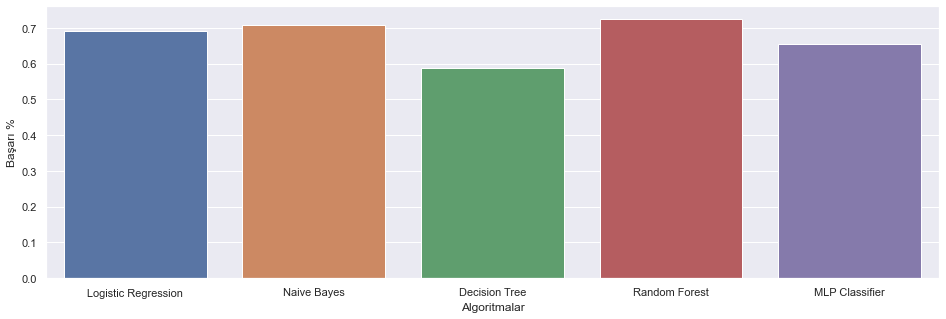

In [51]:
methods = ["Logistic Regression", "Naive Bayes", "Decision Tree", "Random Forest", "MLP Classifier"]
accuracy = [lr_score, nb_score, dtc_score, rf_score, nn_score]

sns.set()
plt.figure(figsize=(16,5))
plt.ylabel("Başarı %")
plt.xlabel("Algoritmalar")
sns.barplot(x=methods, y=accuracy, palette="deep");

**Makine Öğrenmesi alanında sık kullanılan algoritmaları uyguladığımızda en iyi sonucu veren algoritma %72.40 ile Random Forest oldu.**